# Experiments on toy ring data

In [1]:
%env CUDA_VISIBLE_DEVICES=5
%load_ext autoreload
%autoreload 2
import numpy as np
import umap
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix
from umap.my_utils import compute_low_dim_psims, get_ring
import os
import pickle


env: CUDA_VISIBLE_DEVICES=5


In [2]:
fig_path = "../figures"
data_path = "../data/toy_ring"

data_seed = 3
umap_seed = 0

radius = 4
sig = 0.5
sig_str = "_".join(str(sig).split("."))
n = 1000

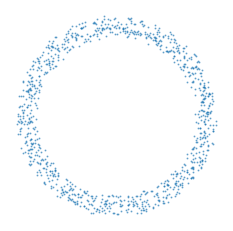

In [3]:
try:
    data = np.load(os.path.join(data_path, f"toy_ring_{n}_{radius}_{sig_str}_original_seed_{data_seed}.npy"))
except FileNotFoundError:
    np.random.seed(data_seed)
    data = get_ring(n, radius, sig, noise="uniform")
    np.save(os.path.join(data_path,
                         f"toy_ring_{n}_{radius}_{sig_str}_original_seed_{data_seed}.npy"),
            data)

fig_data = plt.figure()
plt.scatter(*data.T, s=1, alpha = 0.5)
plt.gca().set_aspect("equal")
plt.axis('off')
fig_data.savefig(os.path.join(fig_path, f"toy_ring_{n}_{radius}_{sig_str}_original_seed_{data_seed}.png"),
                 bbox_inches = 'tight',
                 pad_inches = 0,dpi=300)

In [4]:
# Initialize at the input data
try:
    with open(os.path.join(data_path, f"toy_ring_{n}_{radius}_{sig_str}_t_seed_{data_seed}_{umap_seed}.pkl"), "rb") as file:
        umapperns_init = pickle.load(file)
        embd_init = umapperns_init.embedding_
except FileNotFoundError:
    umapperns_init = umap.UMAP(init=data,
                                 random_state=umap_seed)
    embd_init = umapperns_init.fit_transform(data)
    with open(os.path.join(data_path, f"toy_ring_{n}_{radius}_{sig_str}_umapperns_init_seed_{data_seed}_{umap_seed}.pkl"), "wb") as file:
        pickle.dump(umapperns_init, file, pickle.HIGHEST_PROTOCOL)

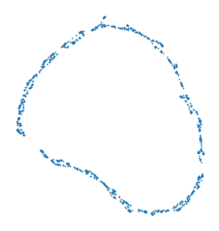

In [5]:
plt.scatter(*embd_init.T, s=1, alpha = 0.5)
plt.gca().set_aspect("equal")
plt.axis('off')
plt.savefig(os.path.join(fig_path, f"toy_ring_{n}_{radius}_{sig_str}_init_seed_{data_seed}_{umap_seed}.png"),
            bbox_inches = 'tight',
            pad_inches = 0,dpi=300)

In [6]:
# Default UMAP hyperparameters
try:
    with open(os.path.join(data_path, f"toy_ring_{n}_{radius}_{sig_str}_umapperns_default_seed_{data_seed}_{umap_seed}.pkl"), "rb") as file:
        umapperns_default = pickle.load(file)
        embd_default = umapperns_default.embedding_
except FileNotFoundError:
    umapperns_default = umap.UMAP(
        random_state=0)
    embd_default = umapperns_default.fit_transform(data)
    with open(os.path.join(data_path, f"toy_ring_{n}_{radius}_{sig_str}_umapperns_default_seed_{data_seed}_{umap_seed}.pkl"), "wb") as file:
        pickle.dump(umapperns_default, file, pickle.HIGHEST_PROTOCOL)


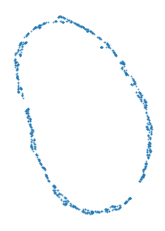

In [7]:
plt.scatter(*embd_default.T, s=1, alpha=0.5)
plt.gca().set_aspect("equal")
plt.axis('off')
plt.savefig(os.path.join(fig_path, f"toy_ring_{n}_{radius}_{sig_str}_default_seed_{data_seed}_{umap_seed}.png"),
            bbox_inches = 'tight',
            pad_inches = 0,dpi=300)

In [8]:
# Optimize for 10000 epochs
try:
    with open(os.path.join(data_path, f"toy_ring_{n}_{radius}_{sig_str}_umapperns_10000_seed_{data_seed}_{umap_seed}.pkl"), "rb") as file:
        umapperns_10000 = pickle.load(file)
        embd_10000= umapperns_10000.embedding_
except FileNotFoundError:
    umapperns_10000 = umap.UMAP(random_state=umap_seed,
                                  n_epochs=10000,
                                  verbose=True)
    embd_10000 = umapperns_10000.fit_transform(data)
    with open(os.path.join(data_path, f"toy_ring_{n}_{radius}_{sig_str}_umapperns_10000_seed_{data_seed}_{umap_seed}.pkl"), "wb") as file:
        pickle.dump(umapperns_10000, file, pickle.HIGHEST_PROTOCOL)



In [ ]:
plt.scatter(*embd_10000.T, s=1, alpha=0.5)
plt.gca().set_aspect("equal")
plt.axis('off')
plt.savefig(os.path.join(fig_path, f"toy_ring_{n}_{radius}_{sig_str}_10000_seed_{data_seed}_{umap_seed}.png"),
            bbox_inches = 'tight',
            pad_inches = 0,dpi=300)

In [17]:
# Initialize at input data, optimize for 10000 epochs
try:
    with open(os.path.join(data_path, f"toy_ring_{n}_{radius}_{sig_str}_umapperns_init_10000_seed_{data_seed}_{umap_seed}.pkl"), "rb") as file:
        umapperns_init_10000 = pickle.load(file)
        embd_init_10000= umapperns_init_10000.embedding_
except FileNotFoundError:
    umapperns_init_10000 = umap.UMAP(random_state=umap_seed,
                                       init=data,
                                       n_epochs=10000,
                                       verbose=True)
    embd_init_10000 = umapperns_init_10000.fit_transform(data)
    with open(os.path.join(data_path, f"toy_ring_{n}_{radius}_{sig_str}_umapperns_init_10000_seed_{data_seed}_{umap_seed}.pkl"), "wb") as file:
        pickle.dump(umapperns_init_10000, file, pickle.HIGHEST_PROTOCOL)


In [ ]:
plt.scatter(*embd_init_10000.T, s=1,alpha=0.5)
plt.gca().set_aspect("equal")
plt.axis('off')
plt.savefig(os.path.join(fig_path, f"toy_ring_{n}_{radius}_{sig_str}_init_10000_seed_{data_seed}_{umap_seed}.png"),
            bbox_inches = 'tight',
            pad_inches = 0,dpi=300)

In [11]:
# get dense input similarities
min_dist = 0.1
spread = 1.0
a, b= umap.umap_.find_ab_params(spread=spread, min_dist=min_dist)
low_sim = compute_low_dim_psims(data, a, b)
low_sim_sparse = coo_matrix(low_sim)

In [13]:
# Initialize at input data, use dense input similarities
try:
    with open(os.path.join(data_path, f"toy_ring_{n}_{radius}_{sig_str}_umapperns_init_graph_seed_{data_seed}_{umap_seed}.pkl"), "rb") as file:
        umapperns_init_graph = pickle.load(file)
        embd_init_graph = umapperns_init_graph.embedding_
except FileNotFoundError:
    umapperns_init_graph = umap.UMAP(init=data,
                                       graph=low_sim_sparse,
                                       min_dist=min_dist,
                                       spread=spread,
                                       random_state=umap_seed,
                                       verbose=True)
    embd_init_graph = umapperns_init_graph.fit_transform(data)
    with open(os.path.join(data_path, f"toy_ring_{n}_{radius}_{sig_str}_umapperns_init_graph_seed_{data_seed}_{umap_seed}.pkl"), "wb") as file:
        pickle.dump(umapperns_init_graph, file, pickle.HIGHEST_PROTOCOL)


In [ ]:
plt.scatter(*embd_init_graph.T, s=1, alpha=0.5)
plt.gca().set_aspect("equal")
plt.axis('off')
plt.savefig(os.path.join(fig_path, f"toy_ring_{n}_{radius}_{sig_str}_init_graph_seed_{data_seed}_{umap_seed}.png"),
            bbox_inches = 'tight',
            pad_inches = 0,dpi=300)

In [14]:
# Initialize at input data, optimize for 10000 epochs use dense input similarities
try:
    with open(os.path.join(data_path, f"toy_ring_{n}_{radius}_{sig_str}_umapperns_init_graph_10000_seed_{data_seed}_{umap_seed}.pkl"), "rb") as file:
        umapperns_init_graph_10000 = pickle.load(file)
        embd_init_graph_10000 = umapperns_init_graph_10000.embedding_
except FileNotFoundError:
    umapperns_init_graph_10000 = umap.UMAP(init=data,
                                             graph=low_sim_sparse,
                                             min_dist=min_dist,
                                             spread=spread,
                                             n_epochs=10000,
                                             random_state=umap_seed,
                                             verbose=True)
    embd_init_graph_10000 = umapperns_init_graph_10000.fit_transform(data)
    with open(os.path.join(data_path, f"toy_ring_{n}_{radius}_{sig_str}_umapperns_init_graph_10000_seed_{data_seed}_{umap_seed}.pkl"), "wb") as file:
        pickle.dump(umapperns_init_graph_10000, file, pickle.HIGHEST_PROTOCOL)


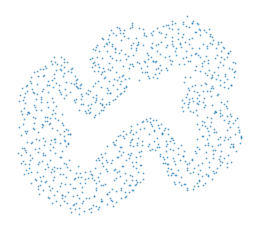

In [15]:
plt.scatter(*embd_init_graph_10000.T, s=1, alpha=0.5)
plt.gca().set_aspect("equal")
plt.axis('off')
plt.savefig(os.path.join(fig_path, f"toy_ring_{n}_{radius}_{sig_str}_init_graph_10000_seed_{data_seed}_{umap_seed}.png"),
            bbox_inches = 'tight',
            pad_inches = 0,dpi=300)




## Push tail of negative samples



In [ ]:
# Initialize at input data, optimize for 10000 epochs and push tail of negative sample
try:
    with open(os.path.join(data_path, f"toy_ring_{n}_{radius}_{sig_str}_umapperns_init_10000_losses_push_tail_seed_{data_seed}_{umap_seed}.pkl"), "rb") as file:
        umapperns_init_10000_losses_push_tail = pickle.load(file)
        embd_init_10000_losses_push_tail = umapperns_init_10000_losses_push_tail.embedding_
except FileNotFoundError:
    umapperns_init_10000_losses_push_tail = umap.UMAP(init=data,
                                                        random_state=umap_seed,
                                                        n_epochs=10000,
                                                        verbose=True,
                                                        push_tail=True)
    embd_init_10000_losses_push_tail = umapperns_init_10000_losses_push_tail.fit_transform(data)
    with open(os.path.join(data_path, f"toy_ring_{n}_{radius}_{sig_str}_umapperns_init_10000_losses_push_tail_seed_{data_seed}_{umap_seed}.pkl"), "wb") as file:
        pickle.dump(umapperns_init_10000_losses_push_tail, file, pickle.HIGHEST_PROTOCOL)


In [ ]:
plt.figure()
plt.scatter(*embd_init_10000_losses_push_tail.T, s=1, alpha = 0.5)
plt.gca().set_aspect("equal")
plt.axis('off')
plt.savefig(os.path.join(fig_path, f"toy_ring_{n}_{radius}_{sig_str}_init_10000_push_tail_seed_{data_seed}_{umap_seed}.png"),
            bbox_inches = 'tight',
            pad_inches = 0,dpi=300)


In [ ]:
# Initialize at input data, optimize for 10000 iterations, use dense input similarities and push tail of negative sample
try:
    with open(os.path.join(data_path, f"toy_ring_{n}_{radius}_{sig_str}_umapperns_init_graph_10000_losses_push_tail_seed_{data_seed}_{umap_seed}.pkl"), "rb") as file:
        umapperns_init_graph_10000_losses_push_tail = pickle.load(file)
        embd_init_graph_10000_losses_push_tail = umapperns_init_graph_10000_losses_push_tail.embedding_
except FileNotFoundError:
    umapperns_init_graph_10000_losses_push_tail = umap.UMAP(init=data,
                                                              graph=low_sim_sparse,
                                                              random_state=umap_seed,
                                                              n_epochs=10000,
                                                              verbose=True,
                                                              push_tail=True)
    embd_init_graph_10000_losses_push_tail = umapperns_init_graph_10000_losses_push_tail.fit_transform(data)
    with open(os.path.join(data_path, f"toy_ring_{n}_{radius}_{sig_str}_umapperns_init_graph_10000_losses_push_tail_seed_{data_seed}_{umap_seed}.pkl"), "wb") as file:
        pickle.dump(umapperns_init_graph_10000_losses_push_tail, file, pickle.HIGHEST_PROTOCOL)

In [ ]:
plt.figure()
plt.scatter(*embd_init_graph_10000_losses_push_tail.T, s=1, alpha = 0.5)
plt.gca().set_aspect("equal")
plt.axis('off')
plt.savefig(os.path.join(fig_path, f"toy_ring_{n}_{radius}_{sig_str}_init_graph_10000_push_tail_seed_{data_seed}_{umap_seed}.png"),
            bbox_inches = 'tight',
            pad_inches = 0,dpi=300)